In [1]:
!pip install pandas scikit-learn imbalanced-learn joblib



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\praka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import joblib


In [3]:
df=pd.read_csv("mexico_crime.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332416 entries, 0 to 332415
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 332416 non-null  int64 
 1   entity_code          332416 non-null  int64 
 2   entity               332416 non-null  object
 3   affected_legal_good  332416 non-null  object
 4   type_of_crime        332416 non-null  object
 5   subtype_of_crime     332416 non-null  object
 6   modality             332416 non-null  object
 7   month                332416 non-null  object
 8   count                332416 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 22.8+ MB


In [4]:
df.isnull().sum()


year                   0
entity_code            0
entity                 0
affected_legal_good    0
type_of_crime          0
subtype_of_crime       0
modality               0
month                  0
count                  0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df
df1=df.drop(["entity_code","affected_legal_good","count"],axis=1)
df1.info()
joblib.dump(df1, 'data_frame.joblib')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332416 entries, 0 to 332415
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   year              332416 non-null  int64 
 1   entity            332416 non-null  object
 2   type_of_crime     332416 non-null  object
 3   subtype_of_crime  332416 non-null  object
 4   modality          332416 non-null  object
 5   month             332416 non-null  object
dtypes: int64(1), object(5)
memory usage: 15.2+ MB


['data_frame.joblib']

<Axes: xlabel='year', ylabel='count'>

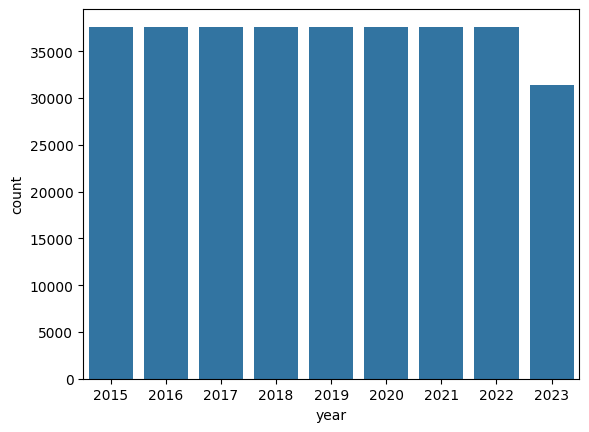

In [7]:
sns.countplot(x="year",data=df)

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
  df[column]=label_encoder.fit_transform(df[column])
df.info()
df=df.astype("float")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332416 entries, 0 to 332415
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   year                 332416 non-null  int64
 1   entity_code          332416 non-null  int64
 2   entity               332416 non-null  int64
 3   affected_legal_good  332416 non-null  int64
 4   type_of_crime        332416 non-null  int64
 5   subtype_of_crime     332416 non-null  int64
 6   modality             332416 non-null  int64
 7   month                332416 non-null  int64
 8   count                332416 non-null  int64
dtypes: int64(9)
memory usage: 22.8 MB


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x=df.drop('type_of_crime', axis=1)
y=df['type_of_crime']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_reg=classification_report(y_test,y_pred)
print(accuracy)
print(conf_matrix)
print(classification_reg)

0.43708260634137536
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       658
         1.0       0.00      0.00      0.00       660
         2.0       0.00      0.00      0.00       690
         3.0       0.00      0.00      0.00       688
         4.0       0.00      0.00      0.00       664
         5.0       0.00      0.00      0.00       681
         6.0       0.00      0.00      0.00       677
         7.0       0.17      0.15      0.16       671
         8.0       0.04      0.00      0.01       689
         9.0       0.41      0.15      0.22       705
        10.0       0.15      0.16      0.15       718
        11.0       0.00      0.00      0.00       675
        12.0       0.35      0.33      0.34       688
        13.0       0.00      0.00      0.00       699
        14.0       0.00      0.00      0.00      

C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [10]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
s=VarianceThreshold(threshold=0.2)
x_train_high_vari=s.fit_transform(x_train)
x_test_high_vari=s.transform(x_test)
print(x_train_high_vari.shape)

(265932, 8)


In [11]:
logreg=LogisticRegression()
logreg.fit(x_train_high_vari,y_train)
pred=logreg.predict(x_test_high_vari)
acc=accuracy_score(y_test,pred)
print(acc)

0.43708260634137536


C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
import joblib
from sklearn.ensemble import RandomForestClassifier
x1 = df.drop(["entity_code","affected_legal_good","count"],axis=1)
y1=df["type_of_crime"]
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Train the Random Forest model
ap = RandomForestClassifier()
ap.fit(x_train1, y_train1)

# Evaluate the model
y_pred = ap.predict(x_test1)
print("Accuracy:", accuracy_score(y_test1, y_pred))
print("Classification Report:", classification_report(y_test1, y_pred))
joblib.dump(ap, 'pgm.joblib')


Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       658
         1.0       1.00      1.00      1.00       660
         2.0       1.00      1.00      1.00       690
         3.0       1.00      1.00      1.00       688
         4.0       1.00      1.00      1.00       664
         5.0       1.00      1.00      1.00       681
         6.0       1.00      1.00      1.00       677
         7.0       1.00      1.00      1.00       671
         8.0       1.00      1.00      1.00       689
         9.0       1.00      1.00      1.00       705
        10.0       1.00      1.00      1.00       718
        11.0       1.00      1.00      1.00       675
        12.0       1.00      1.00      1.00       688
        13.0       1.00      1.00      1.00       699
        14.0       1.00      1.00      1.00       652
        15.0       1.00      1.00      1.00      2634
        16.0       1.00      1.00      1.00 

['pgm.joblib']